<a href="https://colab.research.google.com/github/ethanarsht/detective-dogs/blob/Jen/Jen_working_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

import pandas as pd

In [ ]:
# pytorch lightning is not part of google colab's default
# libraries so I have to pip install
!pip install pytorch_lightning -qq
!pip install --upgrade wandb -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.6/718.6 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00


In [6]:
#import numpy as np
from google.colab import drive
import os
from torchvision.io import read_image
import matplotlib.pyplot as plt

#mount drive
drive.mount("/content/drive")

#set directory
directory = "drive/MyDrive/Pneumonia_Detective_Dogs/chest_xray"

#create an empty list in which to store the # of layers each image has
layers_list = []

#create an empty list in which to store the heights of each image
heights_list = []

#create an empty list in which to store the widths of each image
widths_list = []

#loop through directory using this example: https://pieriantraining.com/iterate-over-files-in-directory-using-python/#:~:text=In%20the%20Python%20code%20above,each%20file%20in%20the%20directory.
for dirpath, dirnames, filenames in os.walk(directory):
  for filename in filenames:
    if filename.endswith('.jpeg'):
      #read in the image
      image = read_image(dirpath + "/" + filename)

      #pull the shape of the image and save to image_shape
      image_shape = list(image.shape)

      #add the # of layers to layers_list initialized above
      layers_list.append(image_shape[0])

      #if image_shape[0] > 1:
        #print("this is an image with greater than 1 layer: ", dirpath + "/" + filename)

      #add the height to a list/np array / df tbd
      heights_list.append(image_shape[1])

      #add the width to the widths_list initialized above
      widths_list.append(image_shape[2])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#mean of widths
avg_width = sum(widths_list) / len(widths_list)
print(avg_width)

#mean of heights
avg_heights = sum(heights_list) / len(heights_list)
print(avg_heights)

1424.1973954763537
1061.5017135023988


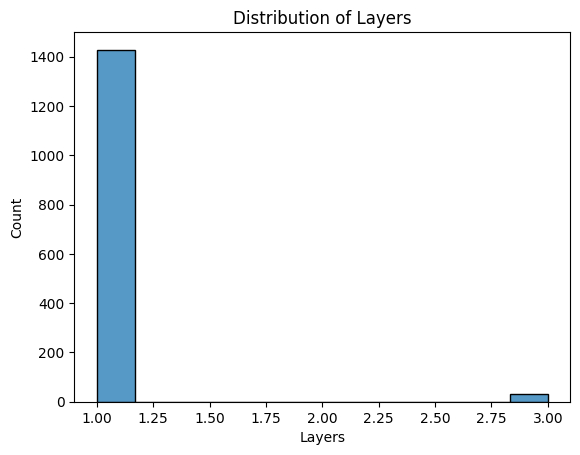

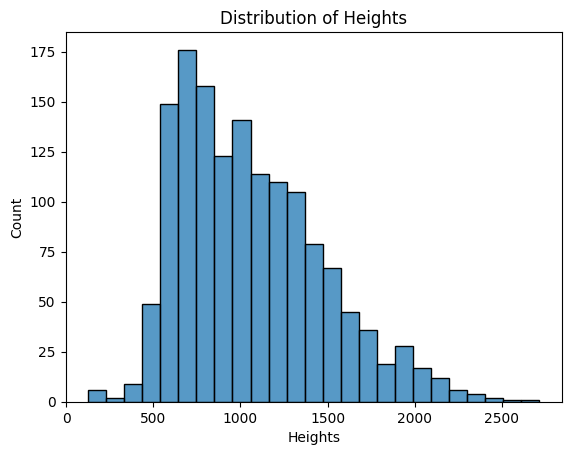

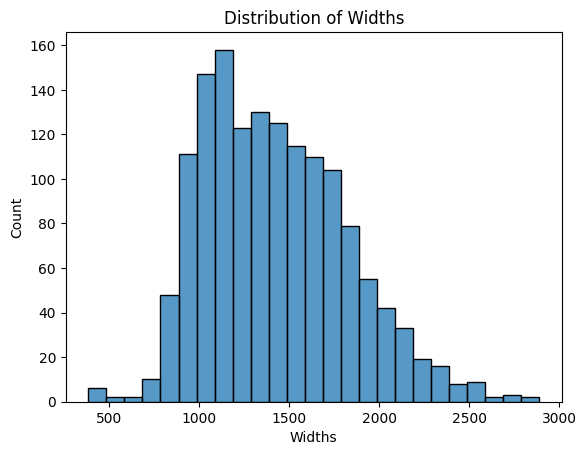

In [3]:
import seaborn as sns

sns.histplot(layers_list)
plt.xlabel('Layers')
plt.ylabel('Count')
plt.title('Distribution of Layers')
plt.show()

sns.histplot(heights_list)
plt.xlabel('Heights')
plt.ylabel('Count')
plt.title('Distribution of Heights')
plt.show()

sns.histplot(widths_list)
plt.xlabel('Widths')
plt.ylabel('Count')
plt.title('Distribution of Widths')
plt.show()